In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

In [49]:
!curl -L -o ./salary-dataset-simple-linear-regression.zip\
  https://www.kaggle.com/api/v1/datasets/download/abhishek14398/salary-dataset-simple-linear-regression
!unzip -o ./salary-dataset-simple-linear-regression.zip -d .

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   457  100   457    0     0    414      0  0:00:01  0:00:01 --:--:--   414
Archive:  ./salary-dataset-simple-linear-regression.zip
  inflating: ./Salary_dataset.csv    


In [50]:
df = pd.read_csv('./Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [51]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [53]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [54]:
X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


MAE: 6286.45
MSE: 49830096.86
RMSE: 7059.04
R²: 0.9024


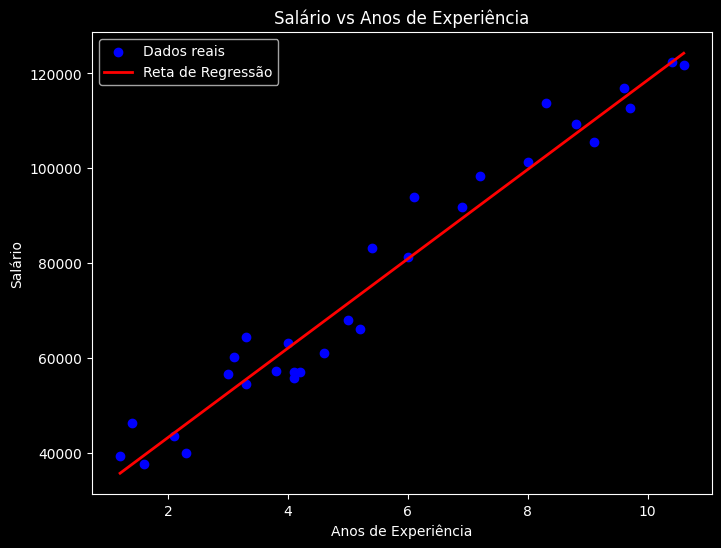

In [56]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Reta de Regressão')
plt.title('Salário vs Anos de Experiência')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [57]:
anos_experiencia = np.array([[5]])
salario_previsto = model.predict(anos_experiencia)

print(f"Salário previsto para {anos_experiencia[0][0]} anos de experiência: ${salario_previsto[0]:.2f}")

Salário previsto para 5 anos de experiência: $71499.28
